In [28]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams["figure.facecolor"] = "white"

In [29]:
df = pd.read_csv('temperature_data.csv', sep=';')
df.head()

,Station,Date,Temperature
0,WSLLAF,202201010000,8.6
1,WSLLAF,202201010010,8.7
2,WSLLAF,202201010020,8.7
3,WSLLAF,202201010030,8.9
4,WSLLAF,202201010040,8.6


In [30]:
# drop first column in df
df = df.drop(df.columns[0], axis=1)
df.head()

,Date,Temperature
0,202201010000,8.6
1,202201010010,8.7
2,202201010020,8.7
3,202201010030,8.9
4,202201010040,8.6


In [31]:
# change Date from YYYYMMDDHHMM to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head()


,Date,Temperature
0,2022-01-01 00:00:00,8.6
1,2022-01-01 00:10:00,8.7
2,2022-01-01 00:20:00,8.7
3,2022-01-01 00:30:00,8.9
4,2022-01-01 00:40:00,8.6


In [32]:
# Temperature to float
#df['Temperature'] = df['Temperature'].str.replace(',', '.').astype(float)

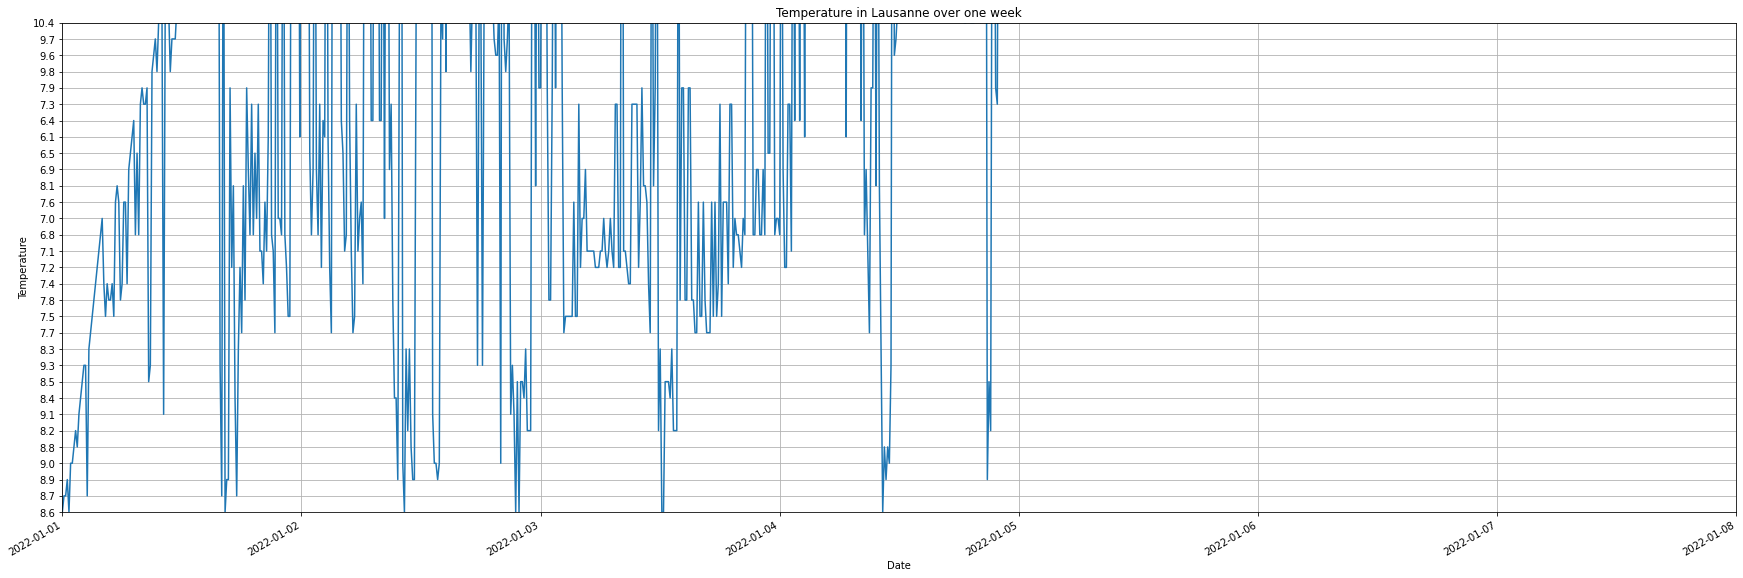

In [33]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df['Date'], df['Temperature'])
ax.set_title('Temperature in Lausanne over one week')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.DateOffset(days=7))
# y axis in croissant order
ax.set_ylim(0, 30)
ax.grid(True)
fig.autofmt_xdate()
plt.show()

In [37]:
df_irr = pd.read_csv('radiation_data.csv', sep=';')
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr['Date'] = pd.to_datetime(df_irr['Date'], format='%Y%m%d%H%M')
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [40]:
# convert Irradiance to float
df_irr['Irradiance'] = df_irr['Irradiance'].str.replace(',', '.').astype(float)

ValueError: could not convert string to float: '-'

TypeError: can only concatenate str (not "DateOffset") to str

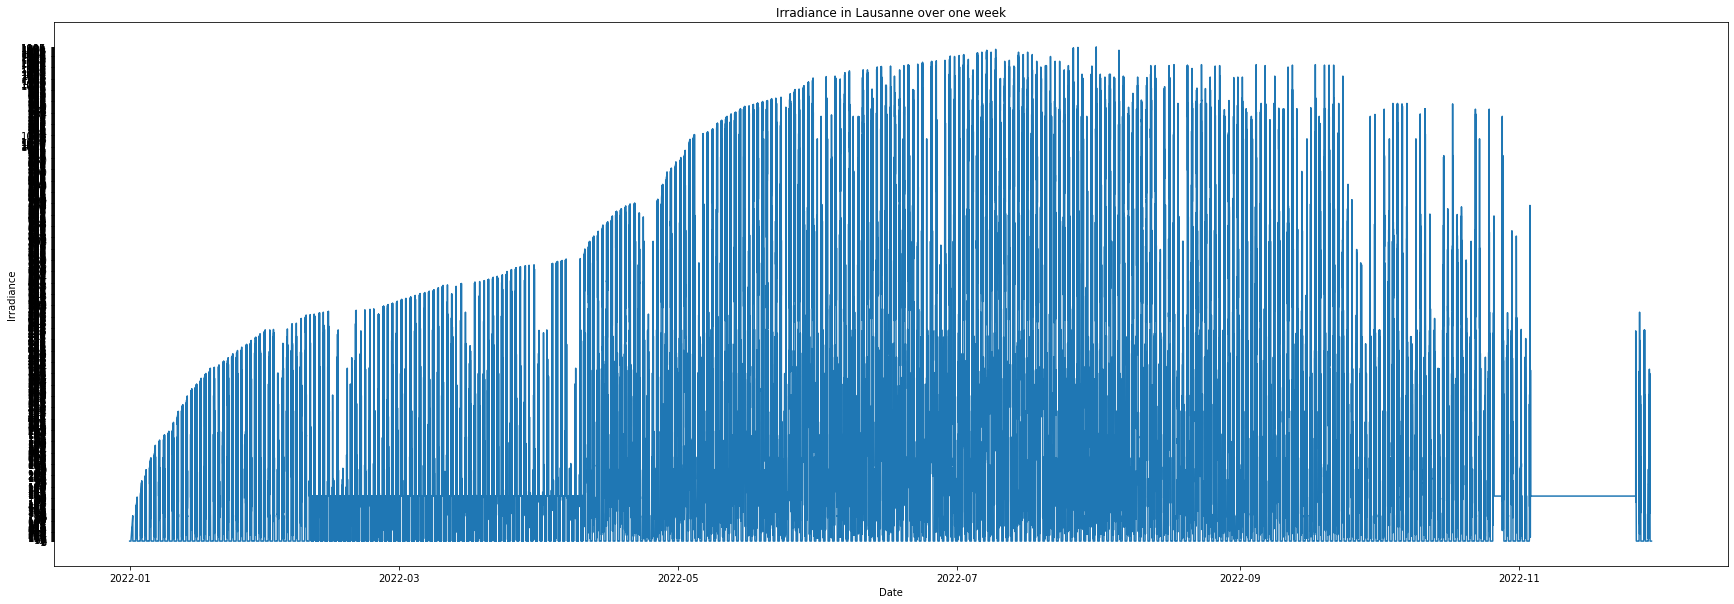

In [39]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df_irr['Date'], df_irr['Irradiance'])
ax.set_title('Irradiance in Lausanne over one week')
ax.set_xlabel('Date')
ax.set_ylabel('Irradiance')
ax.set_xlim(df_irr['Irradiance'].min(), df_irr['Irradiance'].min() + pd.DateOffset(days=7))
# y axis in croissant order
ax.set_ylim(df['Irradiance'].min(), df['Irradiance'].max())
ax.grid(True)
fig.autofmt_xdate()
plt.show()